In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv("clearTrain.csv")

valid_df = pd.read_csv("clearValid.csv")

In [8]:
df_ones = valid_df[valid_df['target'] == 1]

df_zeros = valid_df[valid_df['target'] == 0].head(66)

filtered_df = pd.concat([df_zeros, df_ones])

valid_df = filtered_df.reset_index(drop=True)
valid_df

,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,...,col2584,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662
0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,360.0,360.0,360.0,360.0,6250288.0,6250288.0,6250288.0,6250288.0,6250288.0,6250288.0
1,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,360.0,360.0,360.0,360.0,8145260.0,8145260.0,8145260.0,8145260.0,8145260.0,8145260.0
2,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,360.0,360.0,360.0,360.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0
3,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,240.0,240.0,240.0,240.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0,5000000.0
4,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,360.0,360.0,360.0,360.0,8419200.0,8419200.0,8419200.0,8419200.0,8419200.0,8419200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,8000000.0,8000000.0,8000000.0,8000000.0,8000000.0,8000000.0
227,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,180.0,180.0,180.0,180.0,13199998.0,13199998.0,13199998.0,13199998.0,13199998.0,13199998.0
228,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,8370000.0,8370000.0,8370000.0,8370000.0,8370000.0,8370000.0
229,1,0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,240.0,240.0,240.0,240.0,6500000.0,6500000.0,6500000.0,6500000.0,6500000.0,6500000.0


In [9]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 1,  # Увеличиваем глубину деревьев
    'learning_rate': 0.1,  # Уменьшаем скорость обучения
    'n_estimators': 100,  # Большее количество итераций
    'subsample': 0.6,  # Используем только часть данных на каждой итерации
    'colsample_bytree': 0.8,  # Используем часть признаков
    'gamma': 1,  # Добавляем регуляризацию
    'random_state': 1
}

In [10]:
model = xgb.train(params, dtrain, num_boost_round=100)

c:\Users\KeDr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
y_prob = model.predict(dval)

fpr, tpr, trashers = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

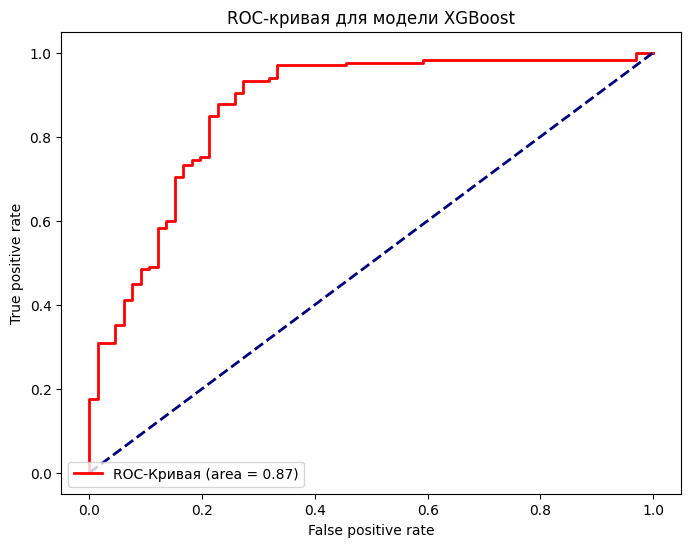

In [12]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower left')
plt.show()